#### Narges Ba
#### Importing needed libraries 

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt 

#### Particles class
we need to save the particle, the best it had been and previous velocity.

In [2]:
class Particle:
    def __init__(self, par, fit, last_v):
        self.par = np.array(par)
        self.best = par
        self.best_fit = fit
        self.v = np.array(last_v)

#### move function for function f

In [3]:
def move_f(p):
    r1 = random.uniform(0, 3);
    r2 = random.uniform(0, 3);
    first = p.v.dot(w)#global w
    sec = np.subtract(p.best, p.par).dot(c1*r1) #c1 is global
    third = np.subtract(Gbest, p.par).dot(c2*r2)#Gbest and c2 are global
    p.v = np.add(first,sec)
    p.v = np.add(p.v, third)
    p.par = np.add(p.par, p.v)

    if(p.par[0]>10):
        p.par[0] = p.par[0]%10
        p.par[0] *= -1
    if(p.par[0]<-10):
        p.par[0]*=-1
        p.par[0] = p.par[0]%10
            
    if(p.par[1]>10 ):
        p.par[1] = p.par[1]%10
        p.par[1]*= -1
    if(p.par[1]<-10):
        p.par[1]*=-1
        p.par[1] = p.par[1]%10

#### move function for function g

In [4]:
def move_g(p):
    r1 = random.uniform(0, 3);
    r2 = random.uniform(0, 3);
    first = p.v.dot(w)#global w
    sec = np.subtract(p.best, p.par).dot(c1*r1) #c1 is global
    third = np.subtract(Gbest_g, p.par).dot(c2*r2)#Gbest and c2 are global
    p.v = np.add(first,sec)
    p.v = np.add(p.v, third)
    p.par = np.add(p.par, p.v)
    if(p.par[0]>100):
        p.par[0] = p.par[0]%100
        p.par[0] *= -1
    if(p.par[0]<-100):
        p.par[0]*=-1
        p.par[0] = p.par[0]%100
            
    if(p.par[1]>100 ):
        p.par[1] = p.par[1]%100
        p.par[1]*= -1
    if(p.par[1]<-100):
        p.par[1]*=-1
        p.par[1] = p.par[1]%100
    
    while(p.par[0] == 0 ):
        p.par[0] = random.uniform(-100, 100)

##### Function f which is used as fitness(the more the better)

In [5]:
def f(p):
    x, y = p[0], p[1]
    h = x**2+y**2
    h = abs(1 - ( (math.sqrt(h))/math.pi ))
    h = math.exp(h)
    h = abs(math.sin(x) * math.cos(y) * h)
    return h

##### Function g which is used as fitness(the less the better)

In [6]:
def g(p):
    x, y = p[0], p[1]
    y_x = (y/x)
    
    h = math.sin(y_x)/(1+math.cos(y_x))
    h = x * math.sin((math.pi*math.cos(x))*math.tan(y)) * h
    return h

checking and updating the global best and the particles best for F and G.

In [7]:
def best_check_f(p):
    global Gbest
    global Gbest_fit
    global check
    
    c = f(p.par)
    if(c >p.best_fit):
        p.best = p.par
        p.best_fit = c
    if(c > Gbest_fit):
        Gbest = p.par
        Gbest_fit = c
        check = True

In [8]:
def best_check_g(p):
    global Gbest_g
    global Gbest_fit_g
    global check
    
    c = g(p.par)
    if(c < p.best_fit):
        p.best = p.par
        p.best_fit = c
    if(c < Gbest_fit_g):
        Gbest_g = p.par
        Gbest_fit_g = c
        check = True

#### Main function(f)

In [13]:
w = 0
c1 = 0
c2 = 0
Gbest = np.array([0,0])
Gbest_fit = -10000000000
check = False
all_generations_f=[]
def main_f(particle_num, c_1, c_2, w_):
    global c1
    global c2
    global w
    global all_generations_f
    c1 = c_1
    c2 = c_2
    w = w_
    
    particles = []
    #making particles
    for i in range(particle_num):
        p_xy = np.array([random.uniform(-10, 10), random.uniform(-10, 10)])

        p_v = np.array([random.uniform(-10, 10), random.uniform(-10, 10)])

        p = Particle(par = p_xy, fit = f(p_xy), last_v = p_v)
        
        particles.append(p)
        best_check_f(p)
        h1=[]
    for i in range(particle_num):
        h1.append(particles[i].par)
     #saving all generations to plot them   
    all_generations_f.append(h1)
    

    
    while(Gbest_fit < 19.2):
        check = False
        for p in particles:
            move_f(p)
            best_check_f(p)
        print("Gbest:", end=" ")
        print(Gbest)
        print("Gbest_fit:", end=" ")
        print(Gbest_fit)
        print("*******")
        
        h1=[]
        for i in range(particle_num):
            h2 = []
            h2.append(particles[i].par[0])
            h2.append(particles[i].par[1])
            h1.append(h2)
    all_generations_f.append(h1)
    
    print("Gbest:", end=" ")
    print(Gbest)
    print("Gbest_fit:", end=" ")
    print(Gbest_fit)
    

#### Running the functions with population = 2000, w = 10 ,c1=5 and c2=10 (for function f)

In [15]:
main_f(2000, 5, 10, 10)

Gbest: [7.95507554 9.68422202]
Gbest_fit: 19.10802555388562
*******
Gbest: [-8.01527621 -9.67434229]
Gbest_fit: 19.19214636713567
*******
Gbest: [-8.0548015   9.65676077]
Gbest_fit: 19.207884662126602
*******
Gbest: [-8.0548015   9.65676077]
Gbest_fit: 19.207884662126602


In [78]:
def plot(arr):
    gen_z_x = []
    gen_z_y=[]
    for j in range(len(arr)):
        gen_z_x = []
        gen_z_y=[]
        for i in range(len(arr[j])):
            gen_z_x.append(arr[j][i][0])
            gen_z_y.append(arr[j][i][1])
#         plot1 = plt.figure(i+1)
        plt.scatter(gen_z_x,gen_z_y)
        plt.show()

### Plotting f

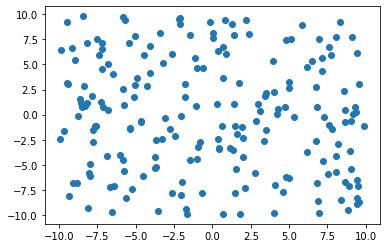

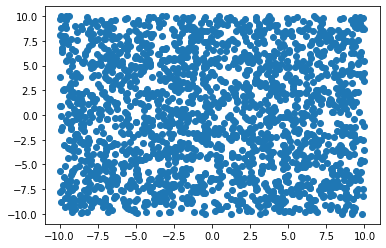

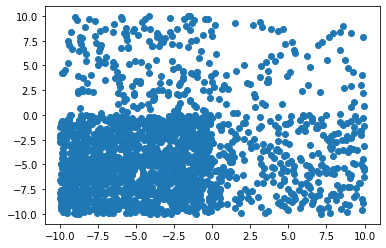

In [59]:
plot(all_generations_f)

#### Main function(g)

In [87]:
w = 0
c1 = 0
c2 = 0
Gbest_g = np.array([0,0])
Gbest_fit_g = 10000000
check = False
all_generations_g=[]
def main_g(particle_num, c_1, c_2, w_):
    global c1
    global c2
    global w
    global all_generations_g
    global Gbest_g
    global Gbest_fit_g
    Gbest_g = np.array([0,0])
    Gbest_fit_g = 10000000
    c1 = c_1
    c2 = c_2
    w = w_
    
    particles = []
    #making the population
    for i in range(particle_num):
        p_xy = np.array([random.uniform(-100, 100), random.uniform(-100, 100)])

        p_v = np.array([random.uniform(-10, 10), random.uniform(-10, 10)])

        p = Particle(par = p_xy, fit = f(p_xy), last_v = p_v)
        
        particles.append(p)
        best_check_g(p)
        h1=[]
    #saving the particles
    for i in range(particle_num):
        h1.append(particles[i].par)
        
    all_generations_g.append(h1)
    


    while(Gbest_fit_g > -1.7 * 1000000):
        check = False
        for p in particles:
            move_g(p)
            best_check_g(p)
        print("Gbest_g:", end=" ")
        print(Gbest_g)
        print("Gbest_fit_g:", end=" ")
        print(Gbest_fit_g)
        print("*******")
        
        h1=[]
        for i in range(particle_num):
            h2 = []
            h2.append(particles[i].par[0])
            h2.append(particles[i].par[1])
            h1.append(h2)
    all_generations_g.append(h1)
#     generation_emtiazi.append(h1)
    
    print("Gbest_g:", end=" ")
    print(Gbest_g)
    print("Gbest_fit_g:", end=" ")
    print(Gbest_fit_g)
    

#### Running the functions with population = 20000, w = 0.5 ,c1=5 and c2=10 (for function g)

In [88]:
main_g(2000, 5, 10, 0.5)

Gbest_g: [ 3.49964445 54.96794976]
Gbest_fit_g: -5340.0739173237835
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50.49856618]
Gbest_fit_g: -65262.76252466262
*******
Gbest_g: [16.07580899 50

Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******
Gbest_g: [ 11.54704643 -36.27657923]
Gbest_fit_g: -575806.8114421302
*******

Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******

Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******

Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******
Gbest_g: [ -8.7971793  -27.63733815]
Gbest_fit_g: -799620.1410601037
*******

Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******
Gbest_g: [-28.2828348  -88.85435506]
Gbest_fit_g: -887330.4912966393
*******

In [91]:
def plot_g(arr):
    gen_z_x = []
    gen_z_y=[]
    for j in range(len(arr)):
        gen_z_x = []
        gen_z_y=[]
        for i in range(0,len(arr[j]),10):
            gen_z_x.append(arr[j][i][0])
            gen_z_y.append(arr[j][i][1])
#         plot1 = plt.figure(i+1)
        plt.scatter(gen_z_x,gen_z_y)
        plt.show()

### Plotting g

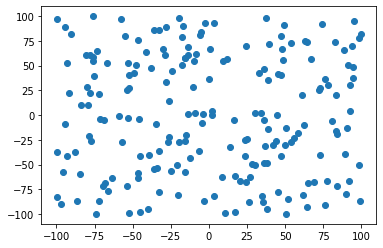

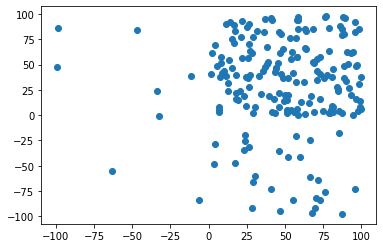

In [92]:
plot_g(all_generations_g)

### after running the algorithm with different parameters i understood that i can get better answers by decreasing w and increasing population.
I also understood that the desired answer will get reached in a few iterations and the key is to increase the population.
If the population is not enough , the desired answer can not be reached even in thousands of iterations.

### The best answer i got was : 
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629

In [104]:
w = 0
c1 = 0
c2 = 0
Gbest_g = np.array([0,0])
Gbest_fit_g = 10000000
check = False
all_generations_g=[]
def main_g_e(particle_num, c_1, c_2, w_):
    global c1
    global c2
    global w
    global all_generations_g
    global Gbest_g
    global Gbest_fit_g
    Gbest_g = np.array([0,0])
    Gbest_fit_g = 10000000
    c1 = c_1
    c2 = c_2
    w = w_
    generation_emtiazi = []
    particles = []
    #making the population
    for i in range(particle_num):
        p_xy = np.array([random.uniform(-100, 100), random.uniform(-100, 100)])

        p_v = np.array([random.uniform(-10, 10), random.uniform(-10, 10)])

        p = Particle(par = p_xy, fit = f(p_xy), last_v = p_v)
        
        particles.append(p)
        best_check_g(p)
        h1=[]
    #saving the particles
    for i in range(particle_num):
        h1.append(particles[i].par)
        
#     all_generations_g.append(h1)
    generation_emtiazi.append(h1)
    


    while(Gbest_fit_g > -5 * 100000000):
        check = False
        for p in particles:
            move_g(p)
            best_check_g(p)
        print("Gbest_g:", end=" ")
        print(Gbest_g)
        print("Gbest_fit_g:", end=" ")
        print(Gbest_fit_g)
        print("*******")
        
        h1=[]
        for i in range(particle_num):
            h2 = []
            h2.append(particles[i].par[0])
            h2.append(particles[i].par[1])
            h1.append(h2)
#     all_generations_g.append(h1)
    generation_emtiazi.append(h1)
    
    print("Gbest_g:", end=" ")
    print(Gbest_g)
    print("Gbest_fit_g:", end=" ")
    print(Gbest_fit_g)
    

In [103]:
main_g_e(100000, 100, 300, 0.1)

Gbest_g: [-30.6565198   96.31186287]
Gbest_fit_g: -1068095.3535529475
*******
Gbest_g: [-30.6565198   96.31186287]
Gbest_fit_g: -1068095.3535529475
*******
Gbest_g: [-30.6565198   96.31186287]
Gbest_fit_g: -1068095.3535529475
*******
Gbest_g: [  8.4757577  -79.88210933]
Gbest_fit_g: -5730886.944415444
*******
Gbest_g: [  8.4757577  -79.88210933]
Gbest_fit_g: -5730886.944415444
*******
Gbest_g: [  8.4757577  -79.88210933]
Gbest_fit_g: -5730886.944415444
*******
Gbest_g: [  8.4757577  -79.88210933]
Gbest_fit_g: -5730886.944415444
*******
Gbest_g: [  8.4757577  -79.88210933]
Gbest_fit_g: -5730886.944415444
*******
Gbest_g: [  8.4757577  -79.88210933]
Gbest_fit_g: -5730886.944415444
*******
Gbest_g: [  8.4757577  -79.88210933]
Gbest_fit_g: -5730886.944415444
*******
Gbest_g: [  8.4757577  -79.88210933]
Gbest_fit_g: -5730886.944415444
*******
Gbest_g: [  8.4757577  -79.88210933]
Gbest_fit_g: -5730886.944415444
*******
Gbest_g: [  8.4757577  -79.88210933]
Gbest_fit_g: -5730886.944415444
****

Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
Gbest_fit_g: -8404651.059183
*******
Gbest_g: [ 21.15800884 -66.46974816]
G

Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.24660977]
Gbest_fit_g: -69352228.51060838
*******
Gbest_g: [ 8.03624552 25.

KeyboardInterrupt: 

In [106]:
main_g_e(100000, 100,100, 0.1)

Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.918

Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.918

Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.91823629
*******
Gbest_g: [-20.77256532  65.25894549]
Gbest_fit_g: -101314124.918

KeyboardInterrupt: 

#### running the algorithm , i understood that it's better to have c1 equal to c2.
#### increasing c1 and c2 is also beneficial.

In [ ]:
main_g_e(100000, 100,100, 0.1)

Gbest_g: [-12.09433671  37.99623815]
Gbest_fit_g: -291354.99940926436
*******
Gbest_g: [ 30.87310522 -96.98676199]
Gbest_fit_g: -438683.66282301303
*******
Gbest_g: [ 30.87310522 -96.98676199]
Gbest_fit_g: -438683.66282301303
*******
Gbest_g: [16.57826804 52.08282779]
Gbest_fit_g: -814126.8978799644
*******
Gbest_g: [16.57826804 52.08282779]
Gbest_fit_g: -814126.8978799644
*******
Gbest_g: [16.57826804 52.08282779]
Gbest_fit_g: -814126.8978799644
*******
Gbest_g: [25.94123547 81.49634487]
Gbest_fit_g: -1181857.1938166071
*******
Gbest_g: [25.94123547 81.49634487]
Gbest_fit_g: -1181857.1938166071
*******
Gbest_g: [25.94123547 81.49634487]
Gbest_fit_g: -1181857.1938166071
*******
Gbest_g: [25.94123547 81.49634487]
Gbest_fit_g: -1181857.1938166071
*******
Gbest_g: [25.94123547 81.49634487]
Gbest_fit_g: -1181857.1938166071
*******
Gbest_g: [25.94123547 81.49634487]
Gbest_fit_g: -1181857.1938166071
*******
Gbest_g: [25.94123547 81.49634487]
Gbest_fit_g: -1181857.1938166071
*******
Gbest_g: 